Project: E-Commerce sales analysis & Customer Behavior

In [ ]:
#NumPy for numerical operations
#pandas for data cleaning and transformations
#Matplotlib for basic plots
#Seaborn for advanced statistical charts

In [1]:
pip install XGBOOST

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta


customers = pd.read_excel(r"C:\Users\cheta\OneDrive\Pictures\Chetan Resume's\Project Data Analyst\Customers Data.xlsx")
orders = pd.read_excel(r"C:\Users\cheta\OneDrive\Pictures\Chetan Resume's\Project Data Analyst\Orders Data.xlsx",)

In [4]:
print(customers.head())

   CustomerID FirstName LastName  Gender  Age        City        State  \
0           1      Yash    Reddy  Female   55  Chandigarh       Punjab   
1           2     Vivek    Gupta  Female   54       Patna        Bihar   
2           3     Rahul   Rathod    Male   19  Aurangabad  Maharashtra   
3           4     Tanvi    Verma    Male   58       Thane  Maharashtra   
4           5     Nisha   Mishra    Male   60      Jaipur    Rajasthan   

    JoinDate  LoyaltyScore PreferredCategory  
0 2021-02-14            86            Beauty  
1 2023-03-26            97             Books  
2 2022-12-23            84             Books  
3 2020-06-07            48            Beauty  
4 2020-05-11            57         Groceries  


In [5]:
print(orders.head())

   OrderID  CustomerID  OrderDate ProductCategory PaymentMethod  Quantity  \
0        1         546 2022-09-07       Groceries    Debit Card         3   
1        2        1492 2021-07-24          Beauty          Cash         4   
2        3        1258 2021-09-06       Groceries   Net Banking         4   
3        4        1320 2022-08-24      Home Decor   Credit Card         1   
4        5        1004 2022-09-22           Books    Debit Card         2   

   UnirPrice  Discount  TotalAmount   Region  
0    2224.48        15      5672.42     East  
1   17550.37         0     70201.48    North  
2   11077.13         5     42093.09    North  
3   20583.24         5     19554.08     East  
4   11375.29         0     22750.58  Central  


Remove Duplicates 

In [6]:
orders.drop_duplicates(inplace=True)

Check Missing values 

In [7]:
orders.isnull().sum()

OrderID            0
CustomerID         0
OrderDate          0
ProductCategory    0
PaymentMethod      0
Quantity           0
UnirPrice          0
Discount           0
TotalAmount        0
Region             0
dtype: int64

Fill the missing value by the mean of that column(if necessary)

In [8]:
orders['TotalAmount'].fillna(orders['TotalAmount'].mean(),inplace=True)

C:\Users\cheta\AppData\Local\Temp\ipykernel_19100\3734557747.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders['TotalAmount'].fillna(orders['TotalAmount'].mean(),inplace=True)


Convert Date column into Pandas form 

In [9]:
orders['OrderDate']=pd.to_datetime(orders['OrderDate'])
customers['JoinDate']=pd.to_datetime(customers['JoinDate'])

Merging the Two tables(Orders & Customers)

In [10]:
df = orders.merge(customers,on='CustomerID', how='left')

In [ ]:
df

,OrderID,CustomerID,OrderDate,ProductCategory,PaymentMethod,Quantity,UnirPrice,Discount,TotalAmount,Region,FirstName,LastName,Gender,Age,City,State,JoinDate,LoyaltyScore,PreferredCategory
0,1,546,2022-09-07,Groceries,Debit Card,3,2224.48,15,5672.42,East,Rohit,Kadam,Male,30,Thane,Maharashtra,2021-07-18,58,Electronics
1,2,1492,2021-07-24,Beauty,Cash,4,17550.37,0,70201.48,North,Divya,Singh,Female,19,Jaipur,Rajasthan,2024-06-25,96,Home Decor
2,3,1258,2021-09-06,Groceries,Net Banking,4,11077.13,5,42093.09,North,Kiran,Kadam,Male,35,Pune,Maharashtra,2020-08-27,98,Beauty
3,4,1320,2022-08-24,Home Decor,Credit Card,1,20583.24,5,19554.08,East,Vikram,Kulkarni,Male,45,Kochi,Kerala,2021-04-09,44,Books
4,5,1004,2022-09-22,Books,Debit Card,2,11375.29,0,22750.58,Central,Rahul,Patil,Female,24,Chennai,Tamil Nadu,2021-02-03,65,Beauty
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1496,1444,2021-09-25,Beauty,Cash,3,18172.79,15,46340.61,South,Ankit,Shetty,Male,19,Indore,Madhya Pradesh,2023-12-25,36,Books
1496,1497,614,2025-01-05,Beauty,UPI,2,14130.94,5,26848.79,Central,Aarav,Pillai,Male,25,Aurangabad,Maharashtra,2021-02-19,49,Groceries
1497,1498,1435,2023-10-11,Groceries,Debit Card,4,15934.36,10,57363.70,North,Tanvi,Patil,Female,55,Varanasi,Uttar Pradesh,2024-09-23,31,Fashion
1498,1499,268,2021-05-28,Home Decor,UPI,5,3842.34,15,16329.94,South,Pooja,Sharma,Male,55,Delhi,Delhi,2023-04-07,92,Electronics


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   OrderID            1500 non-null   int64         
 1   CustomerID         1500 non-null   int64         
 2   OrderDate          1500 non-null   datetime64[ns]
 3   ProductCategory    1500 non-null   object        
 4   PaymentMethod      1500 non-null   object        
 5   Quantity           1500 non-null   int64         
 6   UnirPrice          1500 non-null   float64       
 7   Discount           1500 non-null   int64         
 8   TotalAmount        1500 non-null   float64       
 9   Region             1500 non-null   object        
 10  FirstName          1500 non-null   object        
 11  LastName           1500 non-null   object        
 12  Gender             1500 non-null   object        
 13  Age                1500 non-null   int64         
 14  City    

In [12]:
df.head()

,OrderID,CustomerID,OrderDate,ProductCategory,PaymentMethod,Quantity,UnirPrice,Discount,TotalAmount,Region,FirstName,LastName,Gender,Age,City,State,JoinDate,LoyaltyScore,PreferredCategory
0,1,546,2022-09-07,Groceries,Debit Card,3,2224.48,15,5672.42,East,Rohit,Kadam,Male,30,Thane,Maharashtra,2021-07-18,58,Electronics
1,2,1492,2021-07-24,Beauty,Cash,4,17550.37,0,70201.48,North,Divya,Singh,Female,19,Jaipur,Rajasthan,2024-06-25,96,Home Decor
2,3,1258,2021-09-06,Groceries,Net Banking,4,11077.13,5,42093.09,North,Kiran,Kadam,Male,35,Pune,Maharashtra,2020-08-27,98,Beauty
3,4,1320,2022-08-24,Home Decor,Credit Card,1,20583.24,5,19554.08,East,Vikram,Kulkarni,Male,45,Kochi,Kerala,2021-04-09,44,Books
4,5,1004,2022-09-22,Books,Debit Card,2,11375.29,0,22750.58,Central,Rahul,Patil,Female,24,Chennai,Tamil Nadu,2021-02-03,65,Beauty


Basic Exploratory Analysis

In [13]:
df['TotalAmount'].sum()

np.float64(61212971.71)

In [14]:
df['CustomerID'].nunique()

949

In [15]:
df.groupby('ProductCategory')['Quantity'].sum().sort_values(ascending=False).head(1)

ProductCategory
Fashion    794
Name: Quantity, dtype: int64

Feature Engineering 

In [16]:
df['year'] = df['OrderDate'].dt.year
df['month'] = df['OrderDate'].dt.month
df['month_name'] = df['OrderDate'].dt.month_name()
df['day'] = df['OrderDate'].dt.day_name()
df['week'] = df['OrderDate'].dt.isocalendar().week

In [17]:
df.head()

,OrderID,CustomerID,OrderDate,ProductCategory,PaymentMethod,Quantity,UnirPrice,Discount,TotalAmount,Region,...,City,State,JoinDate,LoyaltyScore,PreferredCategory,year,month,month_name,day,week
0,1,546,2022-09-07,Groceries,Debit Card,3,2224.48,15,5672.42,East,...,Thane,Maharashtra,2021-07-18,58,Electronics,2022,9,September,Wednesday,36
1,2,1492,2021-07-24,Beauty,Cash,4,17550.37,0,70201.48,North,...,Jaipur,Rajasthan,2024-06-25,96,Home Decor,2021,7,July,Saturday,29
2,3,1258,2021-09-06,Groceries,Net Banking,4,11077.13,5,42093.09,North,...,Pune,Maharashtra,2020-08-27,98,Beauty,2021,9,September,Monday,36
3,4,1320,2022-08-24,Home Decor,Credit Card,1,20583.24,5,19554.08,East,...,Kochi,Kerala,2021-04-09,44,Books,2022,8,August,Wednesday,34
4,5,1004,2022-09-22,Books,Debit Card,2,11375.29,0,22750.58,Central,...,Chennai,Tamil Nadu,2021-02-03,65,Beauty,2022,9,September,Thursday,38


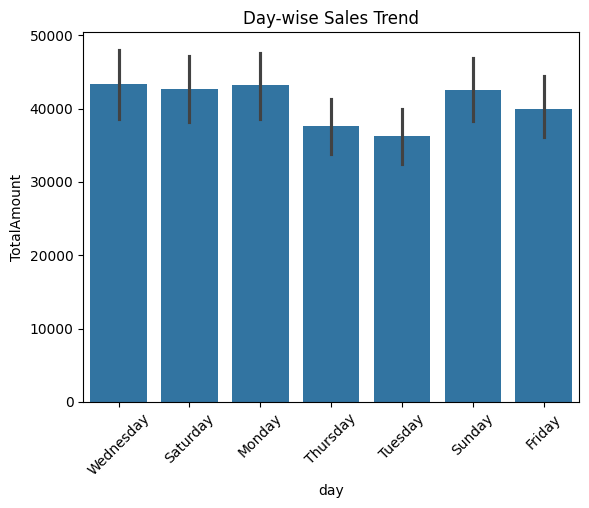

In [ ]:
sns.barplot(x=df['day'], y=df['TotalAmount'])      #uses Seaborn to create a bar chart.
plt.title("Day-wise Sales Trend")
plt.xticks(rotation=45)                            #this avoid overlapping and make easier to read.
plt.show()


RFM Analysis (Regency, frequency, Monetary)

In [ ]:
snapshot_date = df['OrderDate'].max() + timedelta(days=1)        #finds the latest date in the OrderDate column

In [21]:
snapshot_date

Timestamp('2025-02-10 00:00:00')

In [ ]:
rfm = df.groupby('CustomerID').agg({
    'OrderDate' : lambda x : (snapshot_date - x.max()).days,               #lambda is used for short, simple calculations.
    'OrderID': 'nunique',
    'TotalAmount' : 'sum'
})

rfm.columns = ['Recency','frequency','monetary']
rfm.head()

,Recency,frequency,monetary
CustomerID,,,
1,1328,1,57760.25
2,278,1,4894.97
4,18,2,106858.78
5,793,1,23197.04
7,1178,2,131386.39


RFM Segments 

In [28]:
rfm[['recency_score', 'frequency_score', 'monetary_score']].dtypes


recency_score      category
frequency_score    category
monetary_score     category
dtype: object

In [29]:
# R,F,M Score 
#pd.qcut() divides Recency values into 5 equal groups (quintiles)
# .rank(method='first') frequency may have duplicate values, and qcut cannot cut equal values properly

rfm['recency_score'] = pd.qcut(rfm['Recency'],5,labels=[5,4,3,2,1]).astype(str).astype(int)
rfm['frequency_score']= pd.qcut(rfm['frequency'].rank(method='first'),5,labels=[1,2,3,4,5]).astype(str).astype(int)
rfm['monetary_score']=pd.qcut(rfm['monetary'],5,labels=[1,2,3,4,5]).astype(str).astype(int)

rfm['rfm_score']=  (
    rfm['recency_score'] +
    rfm['frequency_score'] +
    rfm['monetary_score']
)

In [30]:
rfm['rfm_score'].head()

CustomerID
1     5
2     6
4    13
5     5
7     9
Name: rfm_score, dtype: int64

In [25]:
def segment_map(x):
    if x >= 13:
        return "Champions"
    elif x >= 10:
        return "Loyal"
    elif x >= 7:
        return "Potential"
    elif x >= 5:
        return "At Risk"
    else:
        return "Hibernating"

rfm['rfm_sum'] = rfm[['recency_score','frequency_score','monetary_score']].astype(int).sum(axis=1)
rfm['segment'] = rfm['rfm_sum'].apply(segment_map)

rfm.head(20)


,Recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score,rfm_sum,segment
CustomerID,,,,,,,,,
1,1328,1,57760.25,1,1,3,113,5,At Risk
2,278,1,4894.97,4,1,1,411,6,At Risk
4,18,2,106858.78,5,3,5,535,13,Champions
5,793,1,23197.04,2,1,2,212,5,At Risk
7,1178,2,131386.39,1,3,5,135,9,Potential
8,97,2,139483.62,5,3,5,535,13,Champions
10,761,3,132649.79,2,5,5,255,12,Loyal
11,957,2,56564.39,2,3,3,233,8,Potential
14,419,3,188755.90,4,5,5,455,14,Champions


RFM Charts 

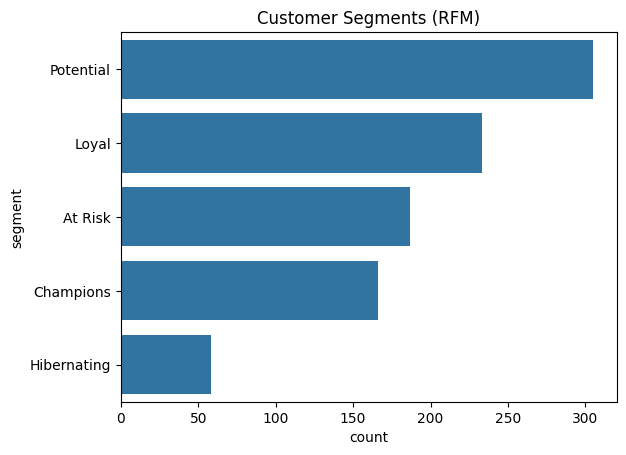

In [26]:
sns.countplot(y='segment', data=rfm, order=rfm['segment'].value_counts().index)
plt.title("Customer Segments (RFM)")
plt.show()


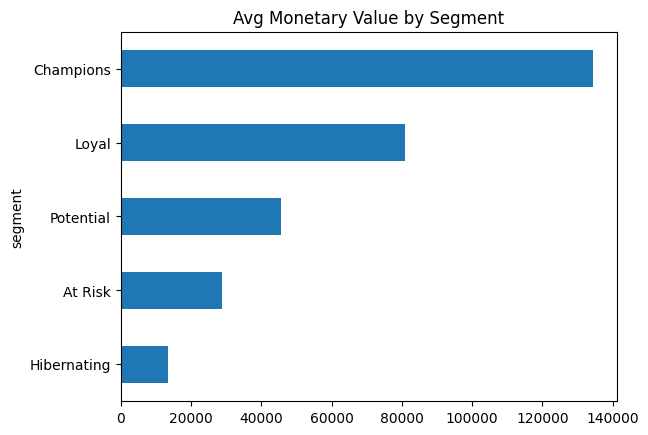

In [ ]:
seg_rev = rfm.groupby('segment')['monetary'].mean().sort_values()        #Average value 
seg_rev.plot(kind='barh', title="Avg Monetary Value by Segment")         #horizontal bar chart
plt.show()


In [39]:
#Customer lifetime value
clv = df.groupby('CustomerID')['TotalAmount'].sum().reset_index().sort_values('TotalAmount', ascending=False).reset_index(drop=True)
clv.head()


,CustomerID,TotalAmount
0,1210,403031.88
1,998,301843.11
2,1229,296790.64
3,631,295648.99
4,529,294845.56


C:\Users\cheta\AppData\Local\Temp\ipykernel_19100\6556678.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.set_index('OrderDate')['TotalAmount'].resample('M').sum()


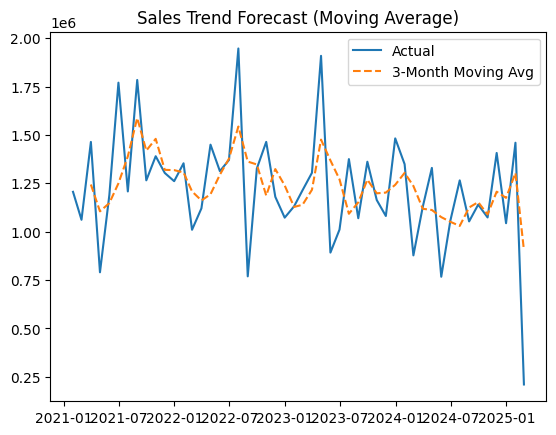

In [44]:
monthly_sales = df.set_index('OrderDate')['TotalAmount'].resample('M').sum()

ma3 = monthly_sales.rolling(3).mean()
plt.plot(monthly_sales, label="Actual")
plt.plot(ma3, label="3-Month Moving Avg", linestyle="--")
plt.legend()
plt.title("Sales Trend Forecast (Moving Average)")
plt.show()
